In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
dataset= r'训练测试集.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [3]:
from sklearn.model_selection import train_test_split
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [31]:
data_pred = pd.read_csv('预测集删除空行.csv')
predX = data_pred.values[:, :-1]
predy = data_pred.values[:, -1]
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
for i in range(X_train.shape[1]):
    predX[:, [i]] = preprocessing.MinMaxScaler().fit_transform(predX[:, [i]])
predX = torch.FloatTensor(predX)
predy = torch.FloatTensor(predy)

In [4]:
# Define the DNN model
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.hidden(x)
        out = self.relu(out)
        out = self.output(out)
        return out

In [5]:
# Convert data to tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [6]:
# Set hyperparameters
input_size = X_train.shape[1]
hidden_size = 100
output_size = 2
learning_rate = 0.001
num_epochs = 100

In [7]:
# Initialize the DNN model
model = DNN(input_size, hidden_size, output_size)

In [8]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [10/100], Loss: 0.6353
Epoch [20/100], Loss: 0.5955
Epoch [30/100], Loss: 0.5639
Epoch [40/100], Loss: 0.5398
Epoch [50/100], Loss: 0.5184
Epoch [60/100], Loss: 0.4974
Epoch [70/100], Loss: 0.4766
Epoch [80/100], Loss: 0.4566
Epoch [90/100], Loss: 0.4377
Epoch [100/100], Loss: 0.4194


In [10]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = torch.argmax(model(X_test), dim=1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Test Accuracy: 70.73%


In [30]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = torch.argmax(model(X_train), dim=1)
    accuracy = (predicted == y_train).sum().item() / len(y_train)
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Test Accuracy: 82.11%


In [33]:
# # Evaluate the model
# model.eval()
# with torch.no_grad():
#     predicted = torch.argmax(model(predX), dim=1)
#     accuracy = (predicted == predy).sum().item() / len(predy)
#     print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

In [34]:
# data_pred['pred'] = predicted
# data_pred.to_csv('predRes.csv',index=False)

Confusion Matrix:
tensor([[12., 12.],
        [12.,  5.]])


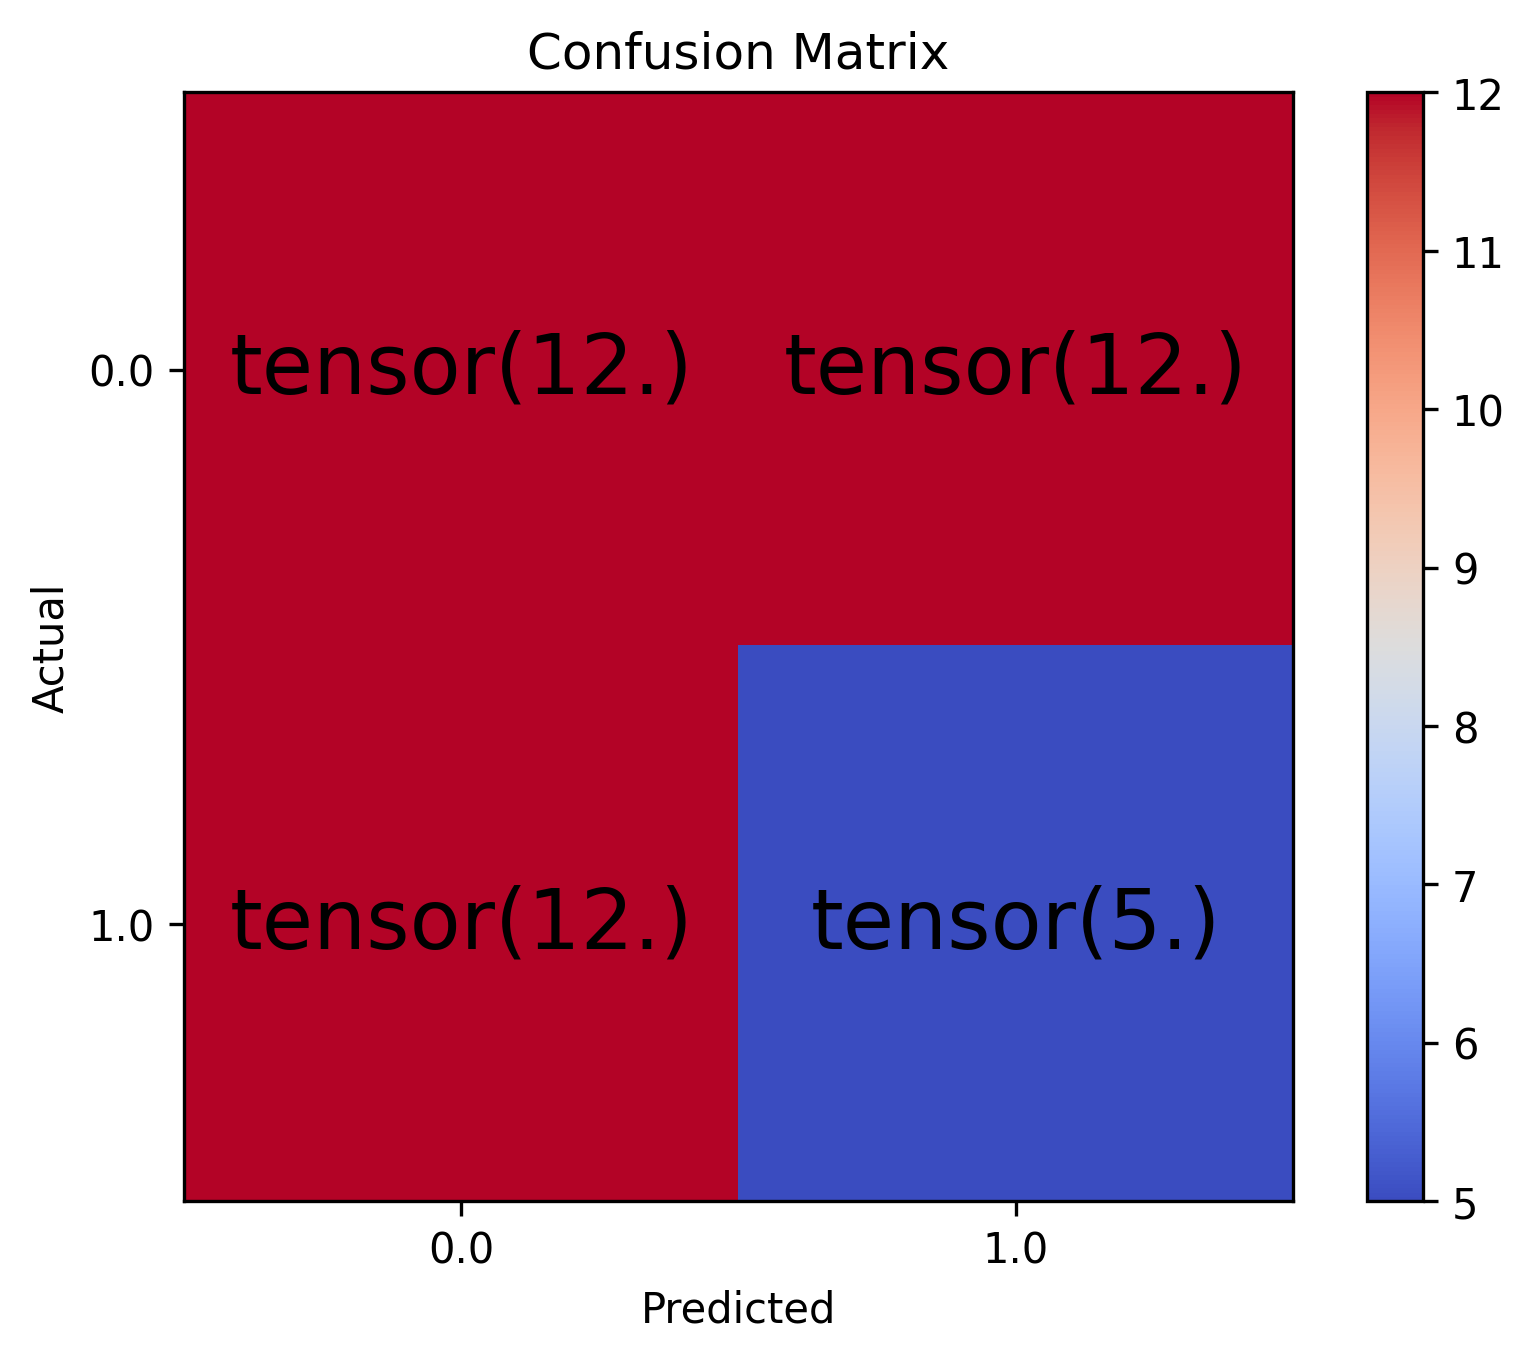

In [17]:
import matplotlib.pyplot as plt
# Calculate confusion matrix
confusion_matrix = torch.zeros(output_size, output_size)
for i in range(len(y_test)):
    true_class = y_test[i]
    predicted_class = predicted[i]
    confusion_matrix[true_class][predicted_class] += 1

print('Confusion Matrix:')
print(confusion_matrix)
plt.figure(dpi=300)
plt.imshow(confusion_matrix, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black', fontsize=20)
plt.savefig('DNN_test.png')
plt.show()
# # Plot ROC curve
# plt.figure()
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

Confusion Matrix:
tensor([[52.,  5.],
        [12., 26.]])


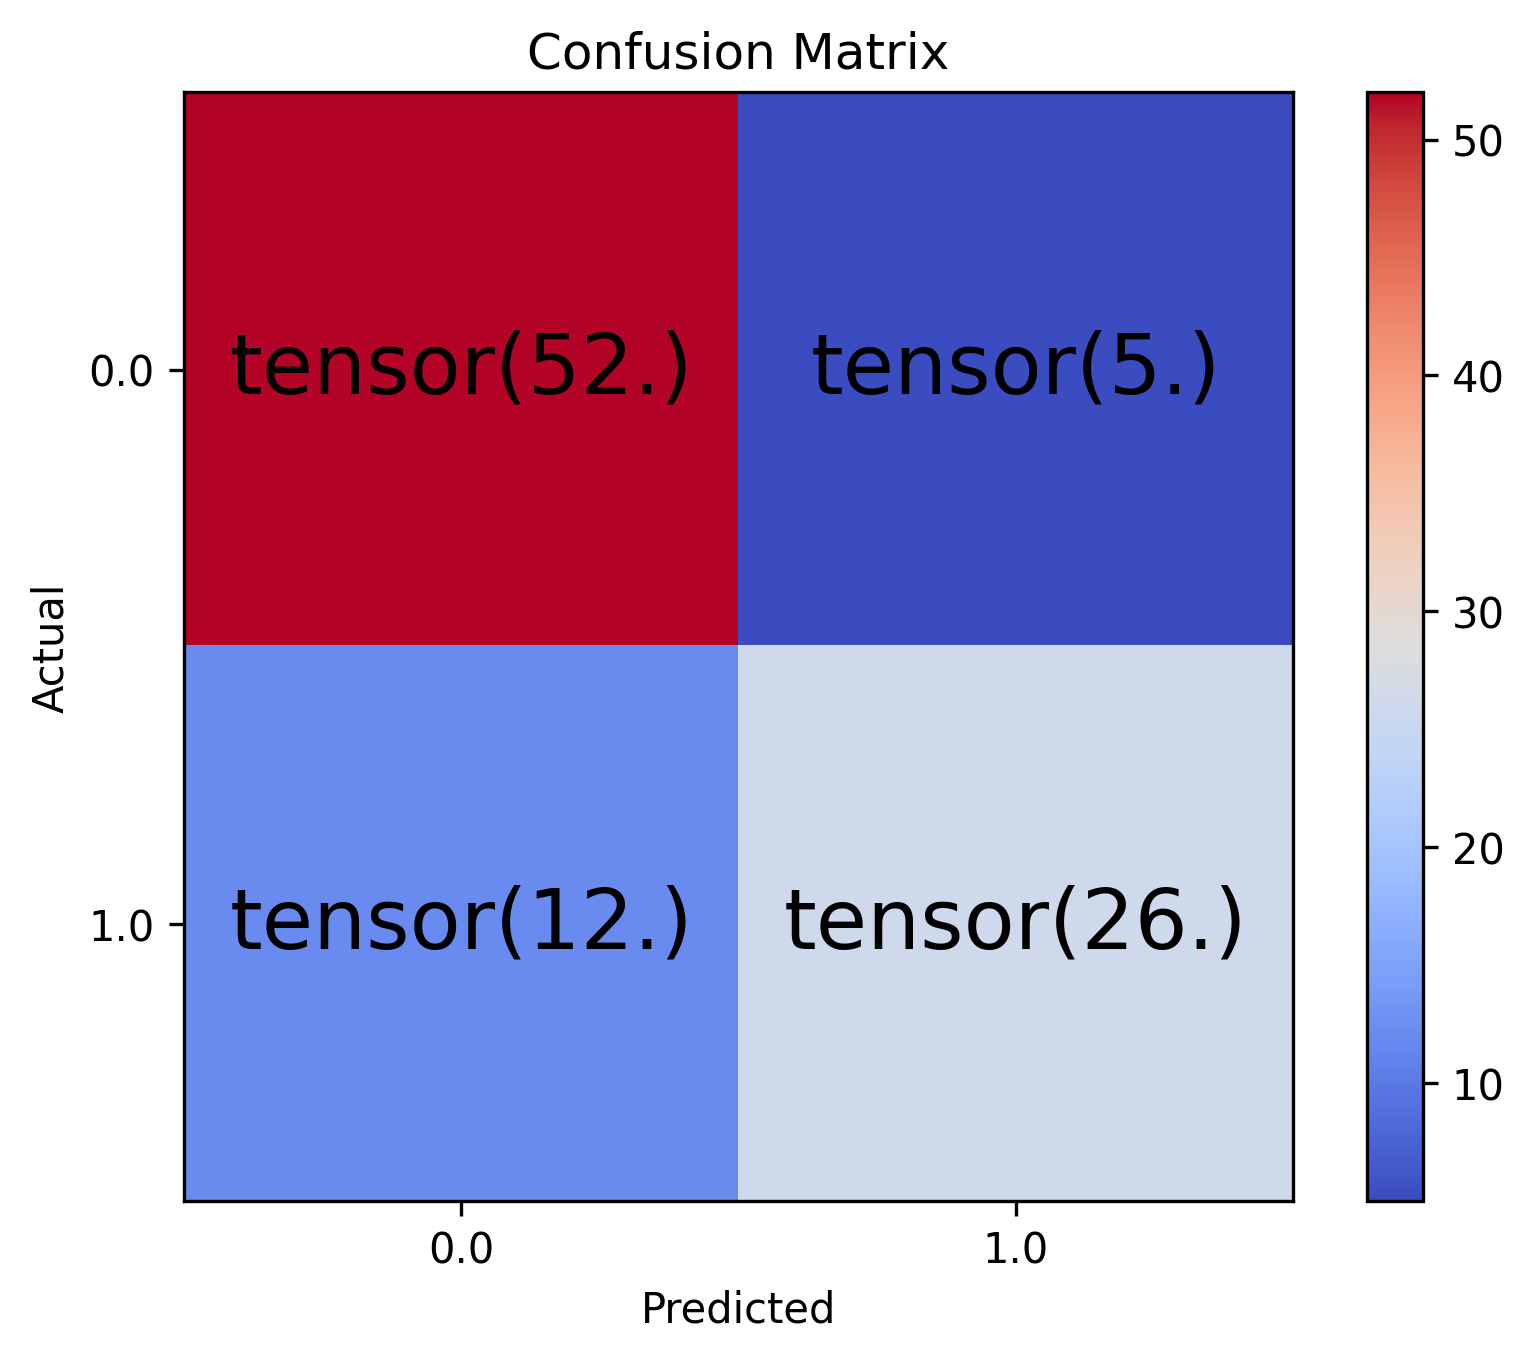

In [16]:
confusion_matrix = torch.zeros(output_size, output_size)
for i in range(len(y_train)):
    true_class = y_train[i]
    predicted_class = predicted[i]
    confusion_matrix[true_class][predicted_class] += 1

print('Confusion Matrix:')
print(confusion_matrix)
plt.figure(dpi=300)
plt.imshow(confusion_matrix, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black', fontsize=20)
plt.savefig('DNN_train.png')
plt.show()

In [19]:
torch.save(model.state_dict(), "model.pt")

In [ ]:
 # model = DNN() model.load_state_dict(torch.load("model.pt"))  #加载

In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = torch.argmax(model(predX), dim=1)
    accuracy = (predicted == predy).sum().item() / len(predy)
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

In [ ]:
data_pred['pred'] = predicted
data_pred.to_csv('predRes.csv',index=False)